# Применяем нейронную сеть для распознавания изображений моделей одежды

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

Учебный курс "[Программирование нейросетей на Python](https://www.asozykin.ru/courses/nnpython)".

<a target="_blank" href="https://colab.research.google.com/github/sozykin/dlpython_course/blob/master/introduction/fashion_mnist_recognition.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
from tensorflow.keras.models import load_model
from google.colab import files
from IPython.display import Image
from tensorflow.keras.preprocessing import image
import numpy as np

In [11]:
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

## Загружаем предварительно обученную нейронную сеть

Закачиваем файл с обученной моделью

In [39]:
!curl https://raw.githubusercontent.com/sozykin/dlpython_course/refs/heads/master/introduction/fmnist_dense.keras -O 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 2502k    0  6890    0     0  14491      0  0:02:56 --:--:--  0:02:56 14505
100 2502k  100 2502k    0     0  2417k      0  0:00:01  0:00:01 --:--:-- 2422k


Загружаем модель в память

In [40]:
model = load_model('fmnist_dense.keras')

In [41]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 800)            │       628,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         8,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 636,012 (2.43 MB)

 Trainable params: 636,010 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## Загружаем в Colab изображение для распознавания

In [ ]:
f = files.upload()

Saving bag.jpg to bag.jpg


In [18]:
!ls

"ls" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [28]:
img_path = 'bag.jpg'

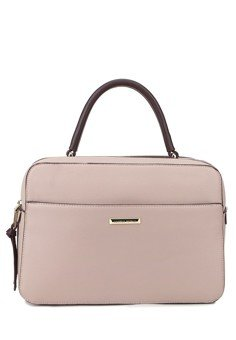

In [29]:
Image(img_path, width=150, height=150)

## Распознаем изображение

Загружаем изображение из файла с помощью инструментов Keras

In [30]:
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")

Предварительная обработка изображения

In [31]:
# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
# Нормализуем изображение
x /= 255

Запускаем распознавание

In [32]:
prediction = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Результаты распознавания

In [33]:
prediction

array([[6.2343781e-05, 1.4347747e-04, 7.5184425e-06, 4.3766255e-07,
        3.2320766e-09, 8.0293269e-15, 2.2558058e-06, 5.3296626e-15,
        9.9978393e-01, 5.4054133e-10]], dtype=float32)

In [34]:
prediction = np.argmax(prediction)
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])

Номер класса: 8
Название класса: сумка
